In [0]:
!pip install tensorflow==2.0.0
!pip install scipy
!pip install numpy
!pip install keras==2.3.0
!pip install h5py

In [0]:
import keras
import tensorflow
print(keras.__version__)
print(tensorflow.__version__)

2.3.0
2.0.0


In [0]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

In [0]:
import os
os.chdir("/content/drive/My Drive/University Expert")

In [0]:
dataset = loadtxt("/content/drive/My Drive/University Expert/COMSATS CS final.txt", delimiter= ",")

In [0]:
X = dataset[:,0:4]
Y = dataset[:,4]

In [0]:
print(X[0])
print(Y[0])

[930.   421.    71.    74.57]
1.0


In [0]:
model = Sequential()
model.add(Dense(64, input_dim = 4, activation= 'relu', kernel_initializer= "he_uniform"))
model.add(BatchNormalization())
model.add(Dense(32, activation= 'relu', kernel_initializer= "he_uniform"))
model.add(BatchNormalization())
model.add(Dense(16, activation= 'relu',kernel_initializer= "he_uniform"))
model.add(BatchNormalization())
model.add(Dense(8, activation= 'relu',kernel_initializer= "he_uniform"))
model.add(BatchNormalization())
model.add(Dense(4, activation= 'relu',kernel_initializer= "he_uniform"))
model.add(Dense(1, activation= 'sigmoid'))

In [0]:
print(model.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 64)                320       
_________________________________________________________________
batch_normalization_77 (Batc (None, 64)                256       
_________________________________________________________________
dense_112 (Dense)            (None, 32)                2080      
_________________________________________________________________
batch_normalization_78 (Batc (None, 32)                128       
_________________________________________________________________
dense_113 (Dense)            (None, 16)                528       
_________________________________________________________________
batch_normalization_79 (Batc (None, 16)                64        
_________________________________________________________________
dense_114 (Dense)            (None, 8)               

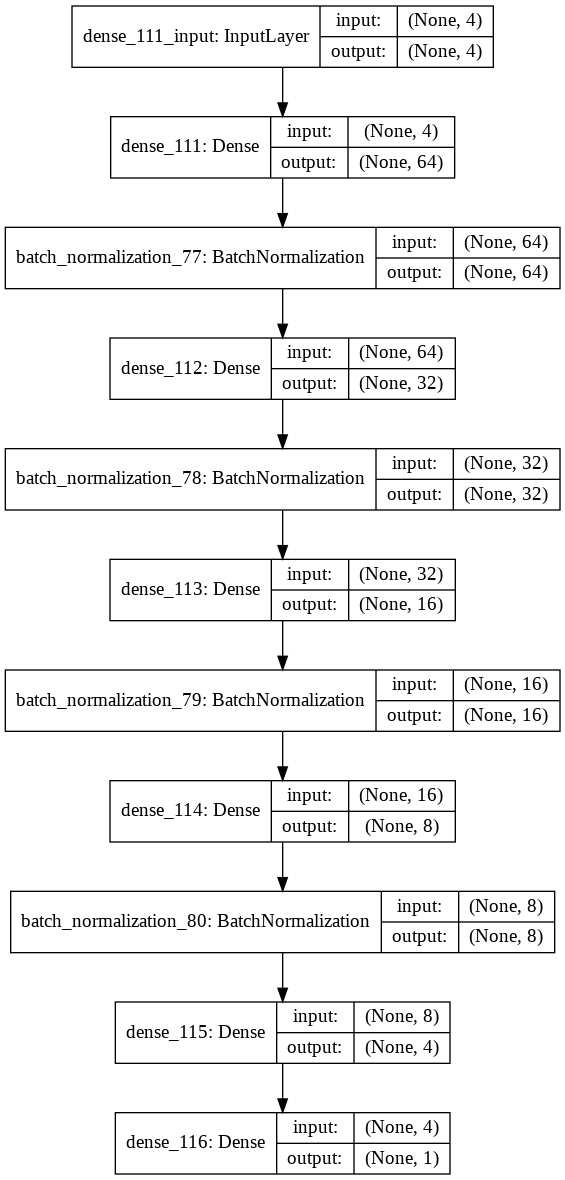

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
adam = keras.optimizers.Adam(learning_rate= 0.001)
sgd = keras.optimizers.SGD(lr=0.001)

In [0]:
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(X,Y,epochs=1000, batch_size= 40, shuffle = True)

Epoch 1/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.7727 - accuracy: 0.5400
Epoch 2/1000
400/400 [==============================] - 0s 73us/step - loss: 0.6059 - accuracy: 0.5625
Epoch 3/1000
400/400 [==============================] - 0s 72us/step - loss: 0.5476 - accuracy: 0.5775
Epoch 4/1000
400/400 [==============================] - 0s 81us/step - loss: 0.5281 - accuracy: 0.6050
Epoch 5/1000
400/400 [==============================] - 0s 72us/step - loss: 0.5150 - accuracy: 0.6400
Epoch 6/1000
400/400 [==============================] - 0s 73us/step - loss: 0.5262 - accuracy: 0.6825
Epoch 7/1000
400/400 [==============================] - 0s 90us/step - loss: 0.5090 - accuracy: 0.6825
Epoch 8/1000
400/400 [==============================] - 0s 88us/step - loss: 0.4994 - accuracy: 0.7025
Epoch 9/1000
400/400 [==============================] - 0s 74us/step - loss: 0.4873 - accuracy: 0.7575
Epoch 10/1000
400/400 [==============================] - 0s 73us/step - lo

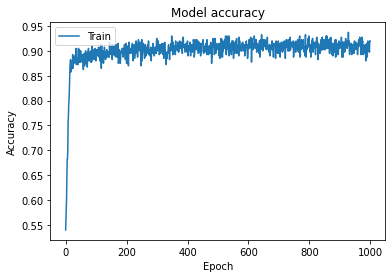

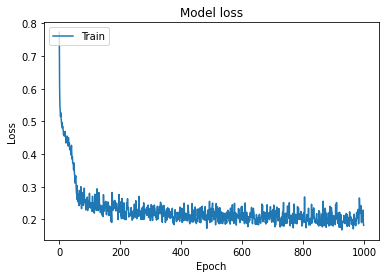

In [0]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("Agg")
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [0]:
_,accuracy = model.evaluate(X,Y)
print("Accuracy:" , accuracy)

400/400 [==============================] - 0s 184us/step
Accuracy: 0.9300000071525574


In [0]:
from keras.models import load_model

model.save("UniversityExpertCS.h5")

In [0]:
model = load_model("UniversityExpertCS.h5")

In [0]:
predictions = model.predict_classes(X)

In [0]:
for i in range(300):
  print("i:", i)
  print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], Y[i]))

i: 0
[930.0, 421.0, 71.0, 74.57] => 1 (expected 1)
i: 1
[870.0, 415.0, 70.0, 73.09] => 1 (expected 1)
i: 2
[978.0, 439.0, 69.0, 75.31] => 1 (expected 1)
i: 3
[909.0, 441.0, 63.0, 71.83] => 1 (expected 1)
i: 4
[919.0, 407.0, 72.0, 73.95] => 1 (expected 1)
i: 5
[876.0, 431.0, 64.0, 71.3] => 1 (expected 1)
i: 6
[971.0, 437.0, 69.0, 75.1] => 1 (expected 1)
i: 7
[945.0, 433.0, 61.0, 70.58] => 1 (expected 1)
i: 8
[951.0, 429.0, 66.0, 72.84] => 1 (expected 1)
i: 9
[944.0, 432.0, 69.0, 74.5] => 1 (expected 1)
i: 10
[874.0, 408.0, 72.0, 73.61] => 1 (expected 1)
i: 11
[919.0, 407.0, 70.0, 72.95] => 0 (expected 1)
i: 12
[947.0, 439.0, 59.0, 70.03] => 1 (expected 1)
i: 13
[965.0, 461.0, 67.0, 75.8] => 1 (expected 1)
i: 14
[931.0, 413.0, 68.0, 72.5] => 0 (expected 1)
i: 15
[959.0, 441.0, 63.0, 72.29] => 1 (expected 1)
i: 16
[879.0, 439.0, 64.0, 71.91] => 1 (expected 1)
i: 17
[939.0, 429.0, 69.0, 74.23] => 1 (expected 1)
i: 18
[875.0, 399.0, 73.0, 73.47] => 0 (expected 1)
i: 19
[936.0, 413.0, 67.0, 

In [0]:
import numpy as np
matric_marks = input("Enter your matric marks:")
FSC_first_year = input("Enter your FSC first year marks:")
NTS = input("Enter your NTS marks:")
aggregate = input("Enter your aggregate:")
list = [matric_marks, FSC_first_year, NTS, aggregate]
x = np.array(list)
x = np.expand_dims(x, axis = 0)
predict = model.predict(x)
# print(predict)
if(predict[0] > 0.5):
  print("Yes, you will get your admission")
else:
  print("Sorry, you will not get your admission")
# print(x.shape)

Enter your matric marks:600
Enter your FSC first year marks:300
Enter your NTS marks:30
Enter your aggregate:40
Sorry, you will not get your admission
